# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [52]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

620

In [53]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list= []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [54]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found.")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : puerto ayora
Processing Record 2 of Set 1 : kruisfontein
Processing Record 3 of Set 1 : hasaki
Processing Record 4 of Set 1 : ushuaia
Processing Record 5 of Set 1 : georgetown
Processing Record 6 of Set 1 : trinidad
Processing Record 7 of Set 1 : hobart
City not found.
Processing Record 8 of Set 1 : rikitea
Processing Record 9 of Set 1 : borovoy
Processing Record 10 of Set 1 : katsuura
Processing Record 11 of Set 1 : karratha
Processing Record 12 of Set 1 : qaanaaq
Processing Record 13 of Set 1 : umm lajj
Processing Record 14 of Set 1 : manokwari
City not found.
Processing Record 15 of Set 1 : sao joao da barra
Processing Record 16 of Set 1 : castanos
Processing Record 17 of Set 1 : lata
Processing Record 18 of Set 1 : webster
City not found.
Processing Record 19 of Set 1 : port hedland
Processing Record 20 of Set 1 : chara
Processing Record 21 of Set 1 : pangnirtung
City not found.
Processing Record

Processing Record 38 of Set 4 : valente
Processing Record 39 of Set 4 : edendale
Processing Record 40 of Set 4 : vardo
Processing Record 41 of Set 4 : samarai
Processing Record 42 of Set 4 : jasper
Processing Record 43 of Set 4 : oum hadjer
Processing Record 44 of Set 4 : evensk
Processing Record 45 of Set 4 : airai
Processing Record 46 of Set 4 : inirida
Processing Record 47 of Set 4 : si satchanalai
Processing Record 48 of Set 4 : iqaluit
Processing Record 49 of Set 4 : sitka
Processing Record 50 of Set 4 : upernavik
Processing Record 0 of Set 5 : shache
Processing Record 1 of Set 5 : barrow
Processing Record 2 of Set 5 : barcelos
Processing Record 3 of Set 5 : hays
Processing Record 4 of Set 5 : kamenka
Processing Record 5 of Set 5 : san patricio
Processing Record 6 of Set 5 : mankono
Processing Record 7 of Set 5 : huangmei
Processing Record 8 of Set 5 : havelock
Processing Record 9 of Set 5 : xuddur
Processing Record 10 of Set 5 : lompoc
Processing Record 11 of Set 5 : camacupa
Pro

Processing Record 30 of Set 8 : kyra
Processing Record 31 of Set 8 : samarinda
Processing Record 32 of Set 8 : mehran
Processing Record 33 of Set 8 : nichinan
Processing Record 34 of Set 8 : xining
Processing Record 35 of Set 8 : nanakuli
Processing Record 36 of Set 8 : hervey bay
Processing Record 37 of Set 8 : fortuna
City not found.
City not found.
Processing Record 38 of Set 8 : san policarpo
Processing Record 39 of Set 8 : cienfuegos
Processing Record 40 of Set 8 : requena
Processing Record 41 of Set 8 : griffith
Processing Record 42 of Set 8 : mayo
Processing Record 43 of Set 8 : port augusta
Processing Record 44 of Set 8 : ribeira grande
City not found.
Processing Record 45 of Set 8 : biak
Processing Record 46 of Set 8 : bagli
Processing Record 47 of Set 8 : gat
Processing Record 48 of Set 8 : forbes
Processing Record 49 of Set 8 : chumikan
Processing Record 50 of Set 8 : rehlingen-siersburg
City not found.
Processing Record 0 of Set 9 : caravelas
Processing Record 1 of Set 9 : 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [55]:
# Create a panda data frame using data retrieved
weather_df = pd.DataFrame({ 
                "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list,
                "Country" : country_list,
                "Date" : date_list
               
                
                
                
               
})

#Exporting data to csv
weather_df.to_csv("../output_data/city.csv")

#Displaying dataframe
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,80.56,89,87,1.99,EC,1645454359
1,Kruisfontein,-34.0033,24.7314,72.88,60,18,16.67,ZA,1645454360
2,Hasaki,35.7333,140.8333,36.00,41,6,22.70,JP,1645454361
3,Ushuaia,-54.8000,-68.3000,55.06,62,0,4.61,AR,1645454356
4,George Town,5.4112,100.3354,84.13,87,40,0.00,MY,1645454362


In [56]:
weather_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [57]:
weather_df 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,80.56,89,87,1.99,EC,1645454359
1,Kruisfontein,-34.0033,24.7314,72.88,60,18,16.67,ZA,1645454360
2,Hasaki,35.7333,140.8333,36.00,41,6,22.70,JP,1645454361
3,Ushuaia,-54.8000,-68.3000,55.06,62,0,4.61,AR,1645454356
4,George Town,5.4112,100.3354,84.13,87,40,0.00,MY,1645454362
...,...,...,...,...,...,...,...,...,...
562,Portland,45.5234,-122.6762,39.47,91,100,7.00,US,1645454403
563,Tsabong,-26.0217,22.4010,94.77,17,5,16.44,BW,1645454842
564,Zabid,14.1951,43.3152,79.63,60,99,12.59,YE,1645454843
565,Udachny,66.4167,112.4000,-3.84,100,82,4.50,RU,1645454843


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [58]:
# --- find cities that have humidity over 100% ---
humidity_over_100 = weather_df.loc[weather_df["Humidity"] > 100, :]

if humidity_over_100.empty == True:
    print("There are no cities with humidity values over 100%")
    print("In this case continue with plotting...")
    
    # --- extract relevant fields from the data frame for plotting ---
    latitudes = weather_df["Lat"]
    temperatures = weather_df["Max Temp"]
    humidity = weather_df["Humidity"]
    cloudiness = weather_df["Cloudiness"]
    windspeed = weather_df["Wind Speed"]
    
else:
    # -- get the indices of cities that have humidity over 100% ---
    Humidityover100Index = humidity_over_100.index
    
    # --- create a clean DataFrame by dropping all humidity outliers by index found above ---
    clean_weather_data = weather_df.drop(Humidityover100Index).reset_index(drop=True)
    clean_weather_data.head()
    
    # --- extract relevant fields from the data frame for plotting ---
    latitudes = clean_weather_data["Lat"]
    temperatures = clean_weather_data["Max Temp"]
    humidity = clean_weather_data["Humidity"]
    cloudiness = clean_weather_data["Cloudiness"]
    windspeed = clean_weather_data["Wind Speed"]

    # --- export the new dataframe into a csv ---
    clean_weather_data.to_csv("../output_data/clean_cities_data.csv", index=True, index_label="City ID", header=True)

There are no cities with humidity values over 100%
In this case continue with plotting...


In [59]:
#  Get the indices of cities that have humidity over 100%

test_stats = weather_df["Humidity"].describe(include = "all")
print("By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in this data")
test_stats

By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in this data


count    567.000000
mean      69.813051
std       22.229695
min        4.000000
25%       58.000000
50%       73.000000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64

In [60]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_100.index

Int64Index([], dtype='int64')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

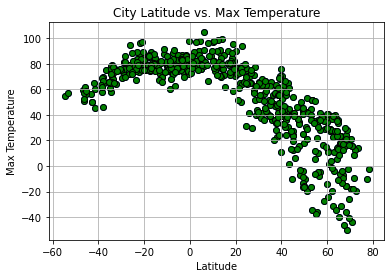

In [61]:
#Converting Date for title of plot
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker = "o")

#Creating plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o", color = "green",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title(f"City Latitude vs. Max Temperature")
plt.savefig("output_data/Latitude vs. Max Temperature Plot.png")
plt.show()

## Latitude vs. Humidity Plot

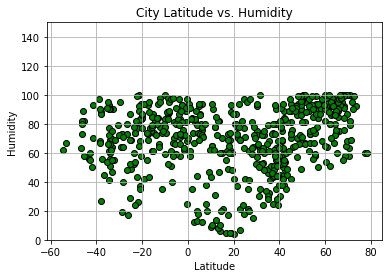

In [62]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o", color = "green",edgecolor = "black")
plt.grid()
plt.ylim(0, weather_df["Humidity"].max()+50)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs. Humidity")
plt.savefig("output_data/Lat_vs_humidity_plot")
plt.show()

## Latitude vs. Cloudiness Plot

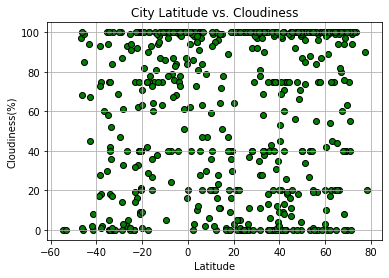

In [63]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o", color = "green",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness")
plt.savefig("output_data/Lat_vs_cloudiness_plot")
plt.show()

## Latitude vs. Wind Speed Plot

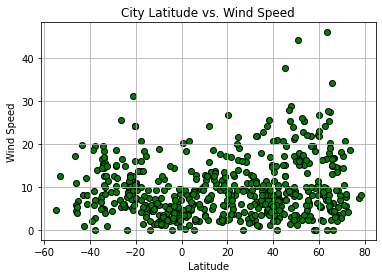

In [64]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o", color = "green",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs. Wind Speed")
plt.savefig("output_data/Lat_vs_windSpeed_plot")
plt.show()

## Linear Regression

In [65]:
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()

In [66]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = weather_df.loc[weather_df["Lat"]>0]
Southern_hemisphere = weather_df.loc[weather_df["Lat"]<0]

Northern_hemisphere.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Hasaki,35.7333,140.8333,36.00,41,6,22.70,JP,1645454361
4,George Town,5.4112,100.3354,84.13,87,40,0.00,MY,1645454362
8,Borovoy,55.4333,86.0833,22.28,58,0,8.95,RU,1645454365
9,Katsuura,35.1333,140.3000,39.31,46,18,9.15,JP,1645454366
11,Qaanaaq,77.4840,-69.3632,-9.99,60,90,7.47,GL,1645454368


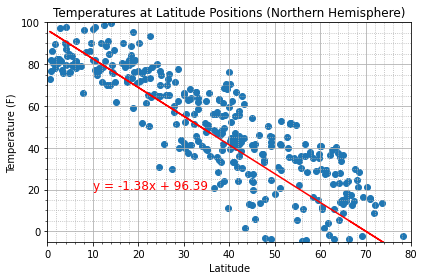

<Figure size 432x288 with 0 Axes>

In [67]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = (x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("output_data/nh_lat_temp_regression.png")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8386581475402424


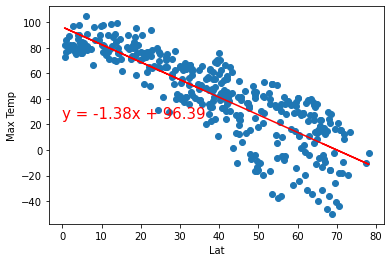

<Figure size 432x288 with 0 Axes>

In [68]:
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (0,25)
plotLinearRegression(Northern_hemisphere[xlbl],Northern_hemisphere[ylbl],xlbl,ylbl,lblpos,6)
plt.savefig("output_data/Linear_Regresion_plot")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5986839205783634


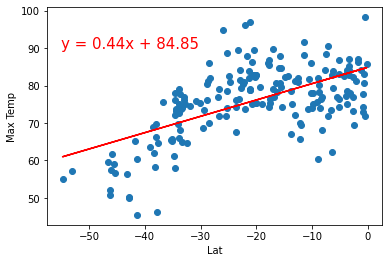

<Figure size 432x288 with 0 Axes>

In [69]:
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (-55,90)
plotLinearRegression(Southern_hemisphere[xlbl],Southern_hemisphere[ylbl],xlbl,ylbl,lblpos,7)
plt.savefig("output_data/Linear_Regresion_plot")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.431879440360338


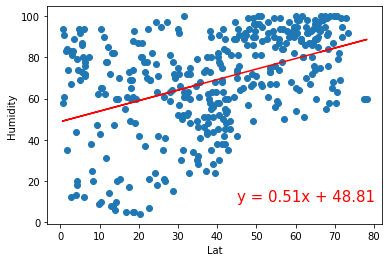

<Figure size 432x288 with 0 Axes>

In [70]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(Northern_hemisphere[xlbl],Northern_hemisphere[ylbl],xlbl,ylbl,lblpos,8)
plt.savefig("output_data/Linear_Regresion_plot")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.19802558447774485


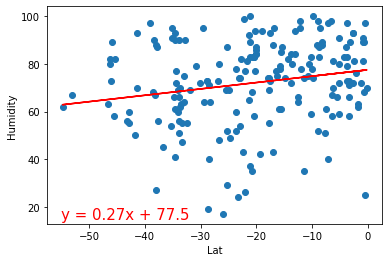

<Figure size 432x288 with 0 Axes>

In [71]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,15)
plotLinearRegression(Southern_hemisphere[xlbl],Southern_hemisphere[ylbl],xlbl,ylbl,lblpos,9)
plt.savefig("output_data/Linear_Regresion_plot")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14507084598311096


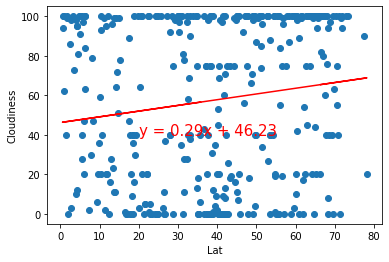

<Figure size 432x288 with 0 Axes>

In [72]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (20,40)
plotLinearRegression(Northern_hemisphere[xlbl],Northern_hemisphere[ylbl],xlbl,ylbl,lblpos,10)
plt.savefig("output_data/Linear_Regresion_plot")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.44171741721691743


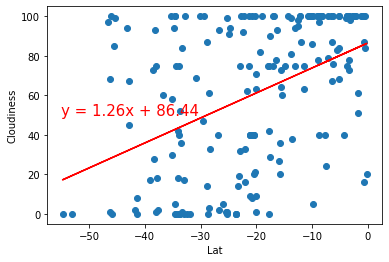

<Figure size 432x288 with 0 Axes>

In [73]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,50)
plotLinearRegression(Southern_hemisphere[xlbl],Southern_hemisphere[ylbl],xlbl,ylbl,lblpos,11)
plt.savefig("output_data/Linear_Regresion_plot")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.15300827961560898


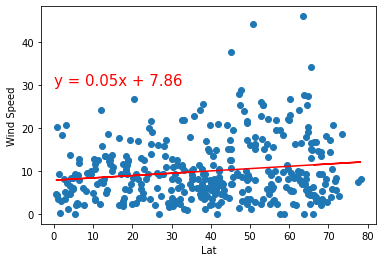

<Figure size 432x288 with 0 Axes>

In [74]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,30)
plotLinearRegression(Northern_hemisphere[xlbl],Northern_hemisphere[ylbl],xlbl,ylbl,lblpos,12)
plt.savefig("output_data/Linear_Regresion_plot")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.31755609938002033


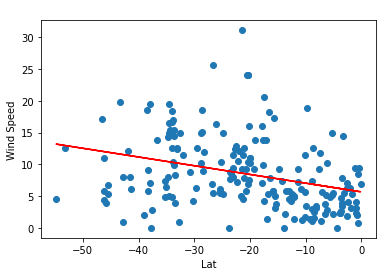

<Figure size 432x288 with 0 Axes>

In [75]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-25,33)
plotLinearRegression(Southern_hemisphere[xlbl],Southern_hemisphere[ylbl],xlbl,ylbl,lblpos,13)
plt.savefig("output_data/Linear_Regresion_plot")